# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:orange">  Numerical exercises 2: Samuele Voltan's notebook.</span>

In [1]:
# LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
def error(AV, AV2, n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

def block_method(data): # Function for blocking method data analysis
    sum_prog = 0.
    sum2_prog = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum2_prog = sum2_prog + data[i]*data[i]
        AV = sum_prog / (i+1)
        AV2 = sum2_prog / (i+1)
        y[i,0] = AV
        y[i,1] = error(AV, AV2, i)
    return y

### <span style="color:red"> Exercise 02.1
Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \text{d}x\,\frac{\pi}{2}\cos\frac{\pi x}{2} = 1 = c = \hbar$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$).

Show a picture of both your estimations of $I$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</span>

### <span style="color:orange"> Solution
The first task is not so different from what I have done in the previous notebook calculating $<r>$. I divided the estimation in <code>N_blocks = 100</code> blocks of <code>N_throws = 10000</code> throws each, therefore having a total number of throws of $10^6$. The following lines define those numbers throughout the notebook.

In [5]:
N_blocks = 100     # Number of blocks
N_throws = 10000   # Number of throws per block
x = np.arange(N_blocks) * N_throws

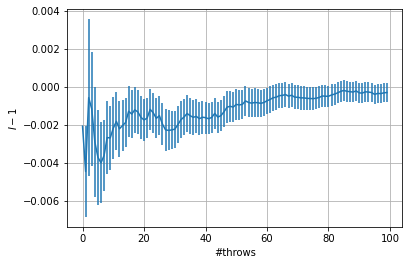

In [12]:
data = np.loadtxt("data/ex02.1.1.out")
plt.errorbar(x,data[:,0]-1,yerr=data[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$I-1$")
plt.grid(True)
plt.show()

I now turn to the second part of the exercise, that is, the evaluation of the integral sampling a non uniform distribution in $[0,1]$. We can see in the picture below that the distribution
$$p(x)=2(1-x),\qquad\int_0^1\text{d}x\,p(x)=1$$
stays sufficently near to the $\cos(\pi x/2)$ if $x\in[0,1]$, especially in the neighborhood of the node at $x = 1$, where the two functions coincide.

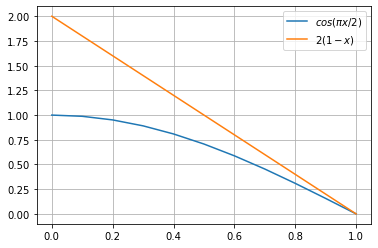

In [10]:
u = np.arange(0,1.1,0.1)
v = np.cos(u*np.pi*0.5)
z = 2 - 2*u
plt.plot(u,v,u,z)
plt.legend(['$cos(\pi x/2)$', '$2(1-x)$']) 
plt.grid(True)
plt.show()

The cumulative is given by the integral
$$y(x)=\int_0^x\text{d}t\,2(1-t)=2x-x^2$$
whence $x=1-\sqrt{1-y}$. The method for this sampling has been implemented in <code>lab2/ex02.1/random.cpp</code>.

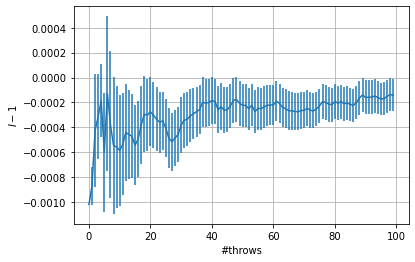

In [15]:
data = np.loadtxt("data/ex02.1.2.out")
plt.errorbar(x,data[:,0]-1,yerr=data[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$I-1$")
plt.grid(True)
plt.show()

Note that importance sampling has improved the estimation of $I$: errors have been significantly reduced.

In [9]:
title = ["Uniform distribution", "Importance sampling"]
data = np.loadtxt("data/ex02.1.out")
x = np.arange(100)

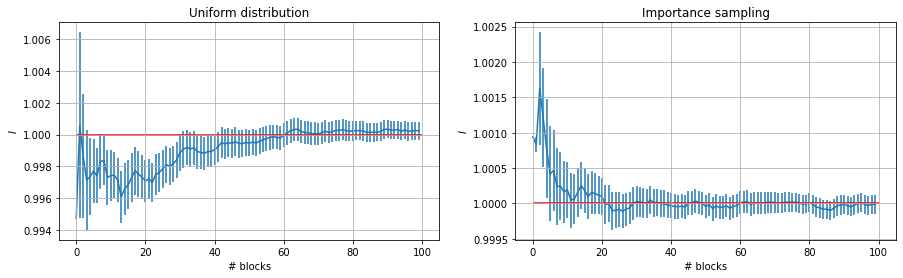

In [11]:
plt.figure(figsize=(15,4))
for i in range(2) :
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    y = block_method(data[:,i])
    plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
    plt.hlines(1, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
    plt.xlabel(r"# blocks")
    plt.ylabel(r"$I$")
    plt.grid(True)
plt.plot();

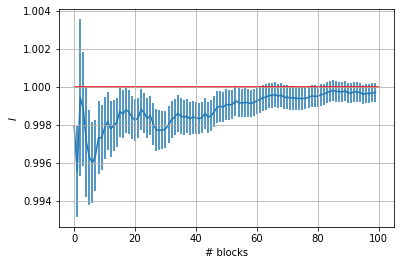

In [23]:
data = np.loadtxt("data/ex02.1.1b.out")
y = block_method(data)
plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
plt.hlines(1, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
plt.xlabel(r"# blocks")
plt.ylabel(r"$I$")
plt.grid(True)
plt.plot();

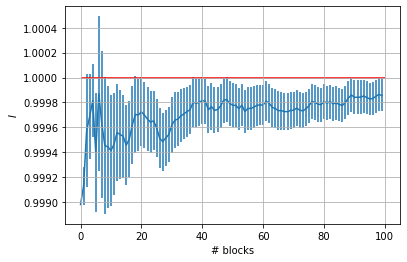

In [24]:
data = np.loadtxt("data/ex02.1.2b.out")
y = block_method(data)
plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
plt.hlines(1, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
plt.xlabel(r"# blocks")
plt.ylabel(r"$I$")
plt.grid(True)
plt.plot();

### <span style="color:red"> Exercise 02.2
Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a=1$ along a *random direction* obtained by sampling *uniformly* the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of 
$$\langle R\rangle=\sqrt{\langle |\vec{r}_N|^2 \rangle_\text{RW}}$$
for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$. Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### <span style="color:orange"> Solution
I divided the estimation in <code>N_blocks = 100</code> blocks of <code>N_RWs = 1000</code> random walks each, therefore performing a total of $10^5$ RWs. Each random walk consists in <code>N_steps = 10000</code> steps.

In [13]:
N_blocks = 100     # Number of blocks
N_RWs = 1000       # Number of random walks per block
x = np.arange(N_blocks) * N_RWs

The two assignments are completed with the implementation of two functions <code>void lattice_RW</code> and <code>void continuum_RW</code>.

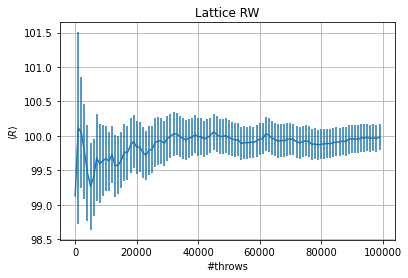

In [18]:
data = np.loadtxt("data/ex02.2.1.out")
plt.title("Lattice RW")
plt.errorbar(x,data[:,0],yerr=data[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$\langle R\rangle$")
plt.grid(True)
plt.show()

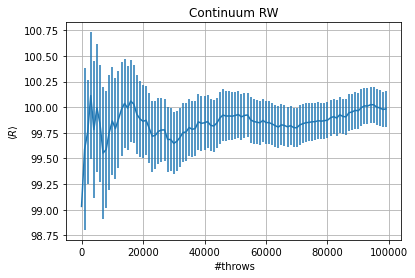

In [19]:
data = np.loadtxt("data/ex02.2.2.out")
plt.title("Continuum RW")
plt.errorbar(x,data[:,0],yerr=data[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$\langle R\rangle$")
plt.grid(True)
plt.show()

In [42]:
title = ["Lattice RW", "Continuum RW"]
data = np.loadtxt("data/ex02.2.out")
x = np.arange(100)

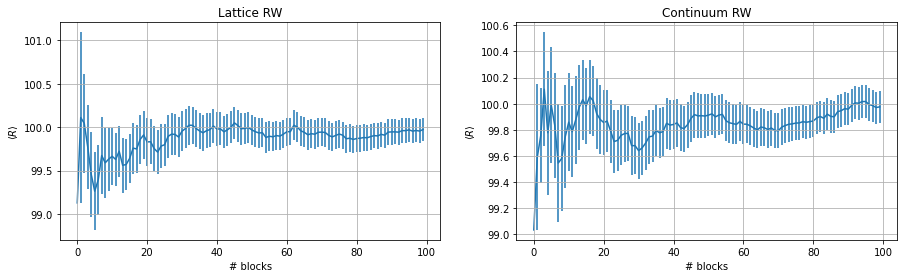

In [43]:
plt.figure(figsize=(15,4))
for i in range(2) :
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    y = block_method(np.sqrt(data[:,i]))
    plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
    plt.xlabel(r"# blocks")
    plt.ylabel(r"$\langle R \rangle$")
    plt.grid(True)
plt.plot();